
# 探索影响电影评分的主要因素

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 在一部电影从拍摄到上映的过程中，每一步都会影响着电影最终的口碑，而决定一部电影水平的高低，所以通过网上的评分可以作为主要参考，现在我将用电影信息数据集进行探索影响电影评分的因素，并将分析过程记录下来，以供参考。

## 问题：

什么类型的电影风格评分最高？

电影的预算与收入是否相关联？




In [96]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## 数据整理




In [97]:
print(df.head(1))
print(df.info())

df.isnull().sum()

       id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.   

       ...                                                overview runtime  \
0      ...       Twenty-two years after the events of Jurassic ...     124   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  

[1 rows x 21 columns]
<class 'pandas.core.frame.DataFra

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

将存在冗余数据行进行整理，有一些数据有缺失值，而在问题一的探讨电影类型时，由于电影类型中存在多种类型，所以首先要先将类型进行提取，而这次探索的问题只要保留预算、收入、电影评分与电影风格种类就可以得出结论，所以其余不相关的数据列可以先忽略不计。


> 

### 数据清理

In [98]:
df.drop_duplicates( inplace =True)
df.dropna(inplace = True)
movie = df.loc[:,['id','budget','revenue','original_title','genres','vote_average']]

In [99]:
tmp = movie["genres"].str.split("|", expand=True).stack().reset_index(level=1,drop=True).rename('genre')
movie.join(tmp).head()

,id,budget,revenue,original_title,genres,vote_average,genre
0,135397,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,Action
0,135397,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,Adventure
0,135397,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,Science Fiction
0,135397,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,Thriller
1,76341,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,Action


In [100]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 6 columns):
id                1992 non-null int64
budget            1992 non-null int64
revenue           1992 non-null int64
original_title    1992 non-null object
genres            1992 non-null object
vote_average      1992 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 188.9+ KB


由于一部电影会有许多种类型分类，先将他的每个类型单独成行，然后算出每种类型的平均评分

In [101]:
genre = movie.join(tmp)
genre_mean = genre.groupby('genre')['vote_average'].mean()

In [102]:
genre_mean.value_counts()

5.983304    1
6.609091    1
6.683333    1
6.312214    1
6.959140    1
6.580357    1
6.317729    1
6.636111    1
6.477059    1
6.016094    1
6.365752    1
6.103195    1
6.070447    1
5.800000    1
6.175248    1
6.115000    1
6.110811    1
5.499267    1
6.225086    1
6.285837    1
Name: vote_average, dtype: int64

In [103]:
genre_mean[genre_mean == genre_mean.max()]

genre
Documentary    6.95914
Name: vote_average, dtype: float64

In [104]:
genre_mean[genre_mean == genre_mean.min()]

genre
Horror    5.499267
Name: vote_average, dtype: float64

取得最大评分类型是“Documentary”，最小评分类型是“Horror”

In [105]:
df['budget'].corr(df['revenue'])

0.7472725961709475

观察一下“budget”与“budget”的相关系数，思考第二个问题探索数据的必要性

In [106]:
data = df.loc[:,['budget','revenue','release_date']]
data = data[ data['budget'] > 0]
data = data[ data['revenue'] > 0]

In [107]:
data.drop_duplicates(subset = 'revenue' , inplace = True)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 0 to 10760
Data columns (total 3 columns):
budget          1285 non-null int64
revenue         1285 non-null int64
release_date    1285 non-null object
dtypes: int64(2), object(1)
memory usage: 40.2+ KB


为避免影响原数据，创建新的变量data来进行第二个问题的探索，并且对'budget','revenue'进行了空集筛选

<a id='eda'></a>
## 探索性数据分析



### 研究问题 1（探索哪种电影类型的评分最高 ）

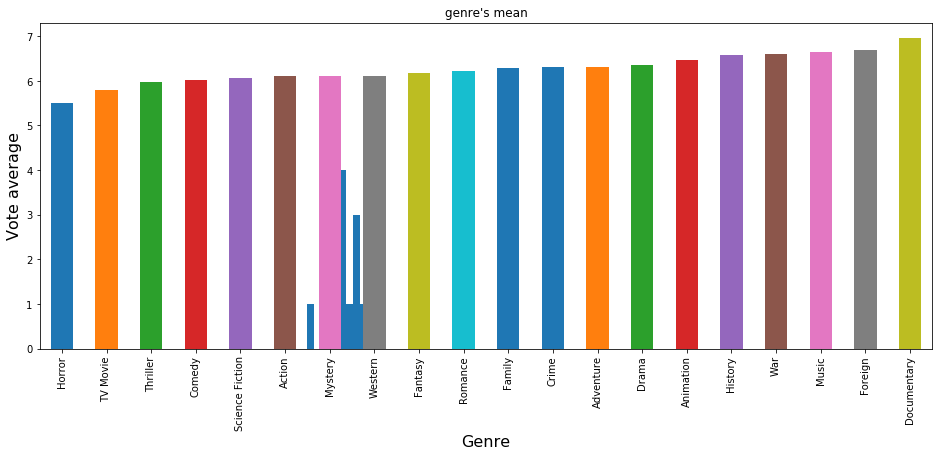

In [109]:
genre_mean.plot.hist();
genre_mean.sort_values().plot(kind = 'bar',title = 'genre\'s mean',figsize = (16,6))
plt.xlabel('Genre',fontsize = 16);
plt.ylabel('Vote average',fontsize = 16);

用柱形图可以看出，电影类型评分最高的是"DocuDocumentary"，评分最低的是"Horror",分值相差不大，而且从图中可以看出所有的电影类型之间的评分相差不大。

### 研究问题 2：探索电影的预算与收入是否相关联。



根据相关系数得知预算与收入是有相关联性的，通过散点图进行直观的判断

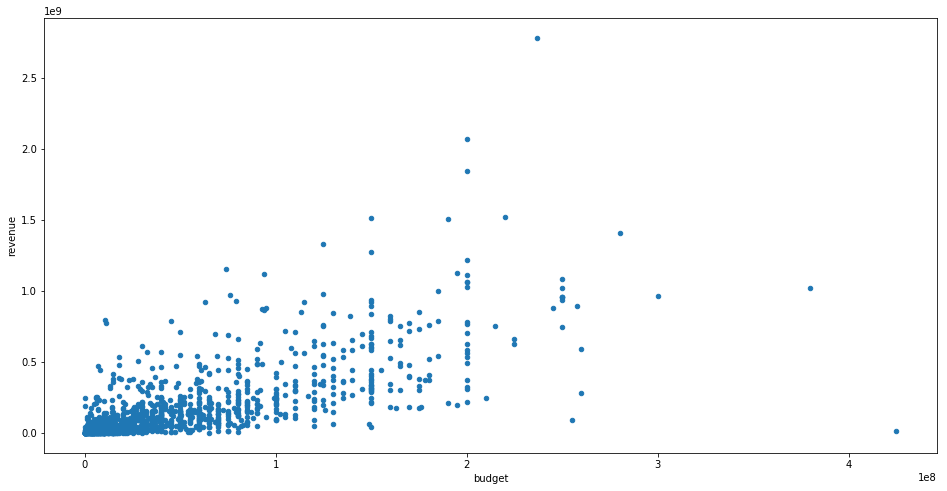

In [110]:
data.plot(kind = 'scatter',x = 'budget',y = 'revenue',figsize =(16,8));

可以发现图中散点是从左下角向右上角的趋势散布，可以判断两个变量为正相关。所以在预算提高的情况下，收入也相对应的近似提高。并且在预算高于10^8时，收入几乎成倍增加，而在预算不高时，收入很少有显著的提高。

<a id='conclusions'></a>
## 结论

> **问题1**：在进行电影类型评分探索中，经过了冗余删除与空值删除，剩余的数据样本在1992个，可以进行合理的数据分析来代表整体情况，已有的电影类型特征也足以概括数据集的所有样本。
电影风格一共20种，其中评分最高的是"DocuDocumentary"，评分最低的是"Horror"，两者评分差距并不明显，而且通过各类型柱形图看出，各类型之间的差距都不是很大，所以得出结论，电影的类型并不是影响电影评分的重要因素，可见现在人们对电影的欣赏是多元化的，观众也更注重内容的好坏，不是很在乎电影的题材，而如果更注重电影评分的话，应该多试着去把重心放在其它影响电影评分的因素上。

> **问题2**：在进行预算与收入的探索中，由于预算与收入存在许多数值为0的样本，将这些样本清理后样本还有1300的左右，数量上来看是足以进行分析的，清理后的数据可能会与实际有些偏差，但是不影响最终结论分析。
关于电影的预算与收入的相关性探索，结论正如大家事先感觉的一样，两者呈正相关分布，电影预算的多少的确影响了票房收入，而且通过图中可以看出，高预算下的电影作品收入也是比大部分电影高的，而只有少数电影在低预算下能达到高收入的成绩，所以可以得出结论，如果作为一个电影制作人，想要得到好的票房收入，前期预算的多投入是必不可少的。

